In [1]:
import numpy as np
import matplotlib.pylab as plt
from numpy.linalg import inv
%matplotlib inline

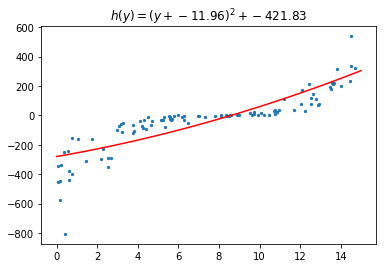

In [5]:
t = [np.random.uniform(0,15) for _ in range(100)]
u = [(t[i] + np.random.normal(0,1)-8)**3 for i in range(100)]
m = len(u)
f = lambda t,x : (t-x[0])**2 + x[1]
g = lambda x: sum([(f(t[i],x)-u[i])**2 for i in range(m)])
grad_g = lambda x: np.array([-4*sum([(t[i]-x[0])*((t[i]-x[0])**2 + x[1] - u[i]) for i in range(m)]),
                                  2*sum([(t[i]-x[0])**2 + x[1] - u[i] for i in range(m)])])

hes_g = lambda x: np.array([[sum([4*((t[i]-x[0])**2+x[1]-u[i])+8*(t[i]-x[0])**2 for i in range(m)]),
                                -4*sum([(t[i]-x[0]) for i in range(m)])],
                                [-4*sum([(t[i]-x[0]) for i in range(m)]),
                                2*m]])
x0 = np.array((0,0))
for i in range(100):
    A = hes_g(x0)
    x0 = x0 - np.matmul(inv(A),grad_g(x0))
_ = plt.scatter(t,u,s=5)
_ = plt.plot(np.linspace(0,15),[f(t,x0) for t in np.linspace(0,15)],color ='red')
_ = plt.title('$h(y)=(y+{:.2f})^2+{:.2f}$'.format(x0[0],x0[1]))

In [21]:
class RegresionNoLineal:
    def __init__(self,t,u):
        self.t = t
        self.u = u
        if len(u) != len(t):
            print('El tamaño de los vectores no es el mismo')
        self.m = len(u)
    def Cuadratica(self,n_iter=100):
        f = lambda t,x : (t-x[0])**2 + x[1]
        g = lambda x: sum([(f(self.t[i],x)-self.u[i])**2 for i in range(self.m)])
        grad_g = lambda x: np.array([-4*sum([(self.t[i]-x[0])*((self.t[i]-x[0])**2 + x[1] - self.u[i]) for i in range(self.m)]),
                                          2*sum([(self.t[i]-x[0])**2 + x[1] - self.u[i] for i in range(self.m)])])

        hes_g = lambda x: np.array([[sum([4*((self.t[i]-x[0])**2+x[1]-self.u[i])+8*(self.t[i]-x[0])**2 for i in range(self.m)]),
                                        -4*sum([(self.t[i]-x[0]) for i in range(self.m)])],
                                        [-4*sum([(self.t[i]-x[0]) for i in range(self.m)]),
                                        2*self.m]])
        x0 = np.array((0,0))
        for i in range(n_iter):
            A = hes_g(x0)
            x0 = x0 - np.matmul(inv(A),grad_g(x0))
        _ = plt.scatter(self.t,self.u,s=5)
        _ = plt.plot(np.linspace(0,15),[f(t,x0) for t in np.linspace(0,15)],color ='red')
        _ = plt.title('$h(y)=(y+{:.2f})^2+{:.2f}$'.format(x0[0],x0[1]))
        self.params = x0
    def Exponencial(self,n_iter=100):
        f = lambda t,x : x[0]*np.exp(x[1]*t)
        g = lambda x: sum([(f(self.t[i],x)-self.u[i])**2 for i in range(self.m)])
        grad_g = lambda x: np.array([2*sum(np.exp(x[1]*self.t[i])*(x[0]*np.exp(x[1]*self.t[i])-self.u[i]) for i in range(self.m)),
                                     2*sum(self.t[i]*x[0]*np.exp(x[1]*self.t[i])*(x[0]*np.exp(x[1]*self.t[i])-self.u[i]) for i in range(self.m))  
                                    ])
        hes_g = 
  


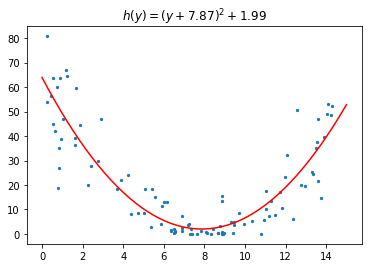

In [29]:
T = [np.random.uniform(0,15) for _ in range(100)]
U = [(T[i] + np.random.normal(0,1)-8)**2 for i in range(100)]

Reg = RegresionNoLineal(T,U)
Reg.(n_iter=10)

In [27]:
Reg.params

array([7.6633018, 0.4946522])